### Brain Tumour Classification
#### J-A-Collins 01-03-2023

In [58]:
# Imports
#!pip install opencv-python  # for cv2
#!pip install tensorflow  # for tensorflow, obvs
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical

In [59]:
print(f"CV2 version: {cv2.__version__}")

CV2 version: 4.7.0


In [60]:
# Set the path to the raining data
training_data_path = 'Training/'
testing_data_path = 'Testing/'

In [47]:
# Define the classes and their corresponding labels
classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
class_labels = {classes[i]: i for i in range(len(classes))}

In [48]:
# Load images and their respective labels
data = []
labels = []
for class_name in classes:
    class_path = os.path.join(training_data_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        data.append(img)
        labels.append(class_labels[class_name])

In [61]:
np.unique(labels)  # 0, 1, 2, 3

array([0, 1, 2, 3])

In [49]:
data[:2]  # Test first few values, matrices of 0

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [50]:
labels[:10]  # Just test the first 10 values, will all be zero

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [51]:
# Convert data and labels to NumPy arrays:
data = np.array(data)
labels = np.array(labels)

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

###### Note:
Next cell required a bit of reading because I am **not** a nerd. To normalise the images we divide by 255 specifically because the pixel values of an image are stored as 8-bit integers, which have a range of 0-255. Dividing by 255 converts the pixel values to floating-point numbers between 0 and 1

In [53]:
# Normalise pixel values
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [54]:
X_train.shape

(2296, 128, 128)

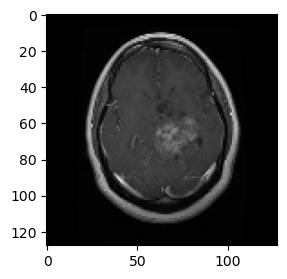

In [67]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.imshow(data[0], cmap='gray')

In [11]:
# Save preprocessed data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

Saved the work above so I can come back to this later. Next steps are probably training a CNN with keras on the preprocessed stuff. Can just leap to loading the cell below in future:

In [12]:
# Load the preprocessed data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [13]:
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [14]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [15]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train it
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))
# Anything above 50 epochs seems a waste of time

Epoch 1/80
72/72 [==============================] - 33s 447ms/step - loss: 1.0824 - accuracy: 0.5348 - val_loss: 0.7941 - val_accuracy: 0.6533
Epoch 2/80
72/72 [==============================] - 31s 425ms/step - loss: 0.7177 - accuracy: 0.6929 - val_loss: 0.6346 - val_accuracy: 0.7300
Epoch 3/80
72/72 [==============================] - 30s 422ms/step - loss: 0.5689 - accuracy: 0.7726 - val_loss: 0.5481 - val_accuracy: 0.7334
Epoch 4/80
72/72 [==============================] - 31s 435ms/step - loss: 0.4204 - accuracy: 0.8328 - val_loss: 0.4258 - val_accuracy: 0.8258
Epoch 5/80
72/72 [==============================] - 31s 430ms/step - loss: 0.3417 - accuracy: 0.8628 - val_loss: 0.4045 - val_accuracy: 0.8432
Epoch 6/80
72/72 [==============================] - 30s 415ms/step - loss: 0.2622 - accuracy: 0.8981 - val_loss: 0.4145 - val_accuracy: 0.8519
Epoch 7/80
72/72 [==============================] - 30s 418ms/step - loss: 0.2284 - accuracy: 0.9172 - val_loss: 0.3914 - val_accuracy: 0.8571

Epoch 58/80
72/72 [==============================] - 30s 421ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.4899 - val_accuracy: 0.9268
Epoch 59/80
72/72 [==============================] - 31s 438ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.5151 - val_accuracy: 0.9199
Epoch 60/80
72/72 [==============================] - 31s 431ms/step - loss: 0.0103 - accuracy: 0.9956 - val_loss: 0.7090 - val_accuracy: 0.9059
Epoch 61/80
72/72 [==============================] - 30s 414ms/step - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.6717 - val_accuracy: 0.9129
Epoch 62/80
72/72 [==============================] - 30s 410ms/step - loss: 0.0156 - accuracy: 0.9943 - val_loss: 0.5480 - val_accuracy: 0.9233
Epoch 63/80
72/72 [==============================] - 32s 450ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.7527 - val_accuracy: 0.9042
Epoch 64/80
72/72 [==============================] - 30s 415ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.7313 - val_accuracy:

In [17]:
# Evaluate
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]:.2f}%")
print(f"Test accuracy: {score[1]:.2f}%")  # 92% not bad, not bad

18/18 [==============================] - 2s 113ms/step - loss: 0.4748 - accuracy: 0.9199
Test loss: 0.47%
Test accuracy: 0.92%


In [18]:
# Save the trained model
model.save('jc_brain_tumor_cnn.h5')

Saved the model here so I can come back and evaluate on the holdout stuff later on. Can just leap to loading the model in cell below:

In [19]:
# Load the trained model
model = load_model('jc_brain_tumor_cnn.h5')

Look for recall and F1 values:

In [20]:
# More metrics
predictions = []
true_labels = []
for class_name in classes:
    class_path = os.path.join(testing_data_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        img = np.expand_dims(img, axis=-1)
        img = img.astype('float32') / 255.
        pred = model.predict(np.array([img]))
        pred_label = np.argmax(pred)
        predictions.append(pred_label)
        true_label = class_labels[class_name]
        true_labels.append(true_label)

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


In [21]:
# Convert preds and true labels to NumPy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

In [68]:
print(f"Recall: {recall_score(true_labels, predictions, average='macro'):.2f}%")
print(f"F1 score: {f1_score(true_labels, predictions, average='macro'):.2f}%")

Recall: 0.86%
F1 score: 0.81%


Try K-fold instead?

In [23]:
# Split the data into training and testing sets using K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(kfold.split(data, labels)):
    print('Fold:', fold+1)
    X_train, y_train = data[train_idx], labels[train_idx]
    X_test, y_test = data[test_idx], labels[test_idx]

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5


In [24]:
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [25]:
# Define CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [26]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=35, validation_data=(X_test, y_test))
# Seems like anything beyond 35 epochs is redundant, after 55 we see a drop in performance

Epoch 1/80
72/72 [==============================] - 32s 438ms/step - loss: 4.5400 - accuracy: 0.5039 - val_loss: 0.8725 - val_accuracy: 0.6167
Epoch 2/80
72/72 [==============================] - 34s 468ms/step - loss: 0.7999 - accuracy: 0.6646 - val_loss: 0.6668 - val_accuracy: 0.7544
Epoch 3/80
72/72 [==============================] - 31s 433ms/step - loss: 0.5857 - accuracy: 0.7657 - val_loss: 0.4528 - val_accuracy: 0.8275
Epoch 4/80
72/72 [==============================] - 33s 462ms/step - loss: 0.4364 - accuracy: 0.8301 - val_loss: 0.3858 - val_accuracy: 0.8641
Epoch 5/80
72/72 [==============================] - 31s 427ms/step - loss: 0.3531 - accuracy: 0.8598 - val_loss: 0.3641 - val_accuracy: 0.8676
Epoch 6/80
72/72 [==============================] - 30s 419ms/step - loss: 0.2935 - accuracy: 0.8937 - val_loss: 0.3443 - val_accuracy: 0.8833
Epoch 7/80
72/72 [==============================] - 32s 451ms/step - loss: 0.2462 - accuracy: 0.9072 - val_loss: 0.3387 - val_accuracy: 0.8920

Epoch 58/80
72/72 [==============================] - 25s 343ms/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.7275 - val_accuracy: 0.8955
Epoch 59/80
72/72 [==============================] - 26s 365ms/step - loss: 0.0553 - accuracy: 0.9817 - val_loss: 0.6776 - val_accuracy: 0.9042
Epoch 60/80
72/72 [==============================] - 28s 384ms/step - loss: 0.0597 - accuracy: 0.9808 - val_loss: 0.6095 - val_accuracy: 0.8990
Epoch 61/80
72/72 [==============================] - 24s 338ms/step - loss: 0.0395 - accuracy: 0.9848 - val_loss: 1.0283 - val_accuracy: 0.8902
Epoch 62/80
72/72 [==============================] - 24s 340ms/step - loss: 0.0842 - accuracy: 0.9778 - val_loss: 1.0244 - val_accuracy: 0.8885
Epoch 63/80
72/72 [==============================] - 25s 350ms/step - loss: 0.0801 - accuracy: 0.9743 - val_loss: 0.5241 - val_accuracy: 0.9059
Epoch 64/80
72/72 [==============================] - 27s 373ms/step - loss: 0.0326 - accuracy: 0.9869 - val_loss: 0.5623 - val_accuracy:

In [28]:
# Evaluate
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]:.2f}%")
print(f"Test accuracy: {score[1]:.2f}%")  # 89% can easily be improved on with hyperparam tuning and less epochs

18/18 [==============================] - 2s 93ms/step - loss: 0.6330 - accuracy: 0.9337
Test loss: 0.63%
Test accuracy: 0.93%


In [29]:
# Save it
model.save(f'jc_brain_tumor_cnn_fold{fold+1}.h5')

In [30]:
# Load the trained model
fold_model = load_model('jc_brain_tumor_cnn.h5')

In [33]:
# Make preds on the test data
fold_predictions = []
fold_true_labels = []
for class_name in classes:
    class_path = os.path.join(testing_data_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        img = np.expand_dims(img, axis=-1)
        img = img.astype('float32') / 255.
        pred = fold_model.predict(np.array([img]))
        pred_label = np.argmax(pred)
        fold_predictions.append(pred_label)
        true_label = class_labels[class_name]
        fold_true_labels.append(true_label)

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


In [34]:
# Convert preds and true labels to NumPy arrays
fold_predictions = np.array(fold_predictions)
fold_true_labels = np.array(fold_true_labels)

In [35]:
kfold_splits = 5

In [36]:
# Load the test data and labels
X_test = []
y_test = []
for class_name in classes:
    class_path = os.path.join(testing_data_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        X_test.append(img)
        label = class_labels[class_name]
        y_test.append(label)

In [37]:
# Convert the test data and labels to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

In [38]:
# Create empty lists to store the predictions of each model
y_pred_list = []

In [39]:
# Iterate over each fold and load the corresponding trained model
for fold in range(kfold_splits):
    # Load the trained model for the current fold
    model_path = f'jc_brain_tumor_cnn_fold5.h5'
    model = load_model(model_path)
    # Make predictions on the test set using the current model
    y_pred = model.predict(X_test)
    # Convert the predicted probabilities to class labels
    y_pred = np.argmax(y_pred, axis=1)
    # Add the predictions for the current model to the list
    y_pred_list.append(y_pred)

13/13 [==============================] - 1s 66ms/step


In [40]:
# Combine the predictions of all models into a single array
y_pred_ensemble = np.stack(y_pred_list, axis=1)

In [41]:
# Calculate majority vote for each test sample across all models
y_pred_majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=y_pred_ensemble)

In [42]:
# Compute the evaluation metrics for the ensemble model
accuracy = accuracy_score(y_test, y_pred_majority_vote)
precision = precision_score(y_test, y_pred_majority_vote, average='macro')
recall = recall_score(y_test, y_pred_majority_vote, average='macro')
f1 = f1_score(y_test, y_pred_majority_vote, average='macro')

In [43]:
# Print the evaluation metrics for the ensemble model
print(f'Accuracy: {accuracy:.2f}')  # Slightly better than before but not good enough
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')

Ensemble model metrics:
Accuracy: 0.92
Precision: 0.91
Recall: 0.88
F1 score: 0.87
